In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

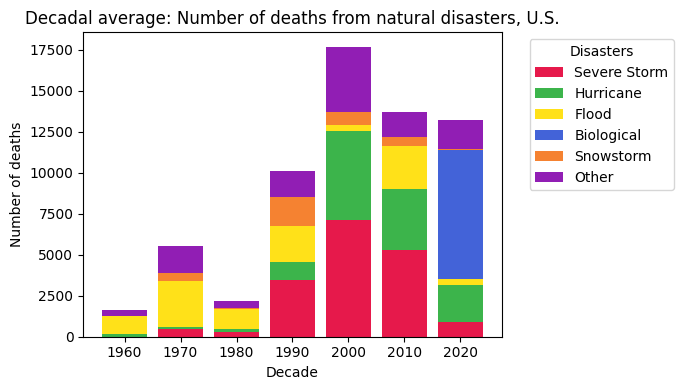

In [2]:
reset_df = pd.read_csv('disasters_by_decade.csv')

graphing = reset_df.drop('state', axis=1).drop('Total', axis=1).groupby('decade').sum()
top_five = list(graphing.sum().sort_values(ascending = False).index[:5])
other = list(graphing.sum().sort_values(ascending = False).index[5:])
def sum_other(row):
    count = 0
    for item in other:
        count += row[item]
    return count

graphing['Other'] = graphing.apply(sum_other, axis=1)
graphing = graphing[top_five + ['Other']]

colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080']

# Plotting with the new color palette
fig, ax = plt.subplots(figsize=(7, 4))

# We will plot each category one by one to create the stacked bar chart
bottom = np.zeros(len(graphing.index))

for i, category in enumerate(graphing.columns):
    ax.bar(graphing.index, graphing[category], bottom=bottom, color=colors[i], label=category, width=8)
    bottom += graphing[category].values

# Customizing the plot
ax.set_title('Decadal average: Number of deaths from natural disasters, U.S.')
ax.set_xlabel('Decade')
ax.set_ylabel('Number of deaths')
ax.legend(title='Disasters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotating the data source and note
#plt.text(0, -50000, 'Data source: EM-DAT, CRED / UCLouvain (2023)', ha='left', fontsize=8)
#plt.text(0, -60000, 'Note: Data includes disasters recorded up to September 2023.', ha='left', fontsize=8)

# Show the plot with vivid colors
plt.tight_layout()
plt.show()

<Axes: xlabel='Year', ylabel='Number of Severe Storm'>

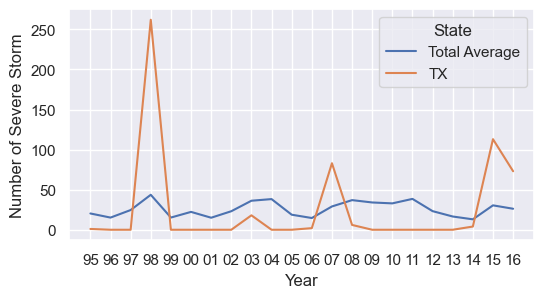

In [3]:
disasters = pd.read_csv('disasters_cleaned_alt.csv')
disasters_tx = disasters[(disasters['incident_type'] == 'Severe Storm') & (disasters['year'] >= 1995) & (disasters['state'] == 'TX')]
disasters_tx = disasters_tx.groupby(['year', 'state']).count().reset_index()
disasters_tx = disasters_tx.rename({'incident_type': 'Number of Severe Storm', 'year': 'Year', 'state': 'State'}, axis=1)
disasters_tx.loc[len(disasters_tx)] = [1996, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [1997, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [1999, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2000, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2001, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2002, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2004, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2005, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2009, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2010, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2011, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2012, 'TX', 0]
disasters_tx.loc[len(disasters_tx)] = [2013, 'TX', 0]
disasters_tl = disasters[(disasters['incident_type'] == 'Severe Storm') & (disasters['year'] >= 1995) & (disasters['year'] <= 2016)]
disasters_tl = disasters_tl.groupby(['year', 'state']).count().reset_index()
disasters_tl = disasters_tl.drop('state', axis=1).groupby('year').mean().reset_index()
disasters_tl['state'] = 'Total Average'
disasters_tl = disasters_tl[['year', 'state', 'incident_type']]
disasters_tl = disasters_tl.rename({'incident_type': 'Number of Severe Storm', 'year': 'Year', 'state': 'State'}, axis=1)
graphing_2 = pd.concat([disasters_tl, disasters_tx])
graphing_2['Year'] = graphing_2['Year'].apply(lambda x: str(x)[2:])
sns.set_theme(rc={'figure.figsize':(6,3)})
sns.lineplot(data=graphing_2, x='Year', y='Number of Severe Storm', hue='State')